# Redrock scaling tests

Starting point prior to Austin dungeon 2017

In [4]:
%pylab inline
import numpy as np
import io

Populating the interactive namespace from numpy and matplotlib


In [27]:
data = b'''
# cpu ncpu   ntarg  time
hsw   4      64     123
hsw   8      64     85
hsw   16     64     68
hsw   32     64     68
hsw   64     64     76

hsw   16     32     50
hsw   16     128    102
hsw   16     256    169

knl   16     64     380
knl   64     64     315
knl   128    64     337

knl   64     128    408
knl   64     256    598
'''

x = np.loadtxt(io.BytesIO(data), dtype=[('cpu', 'S3'), ('ncpu', '<i8'), ('ntarg', '<i8'), ('time', '<f8')])

## Scaling with number of processes for fixed number of targets

HSW/KNL node rate ratio for 64 targets: 4.63


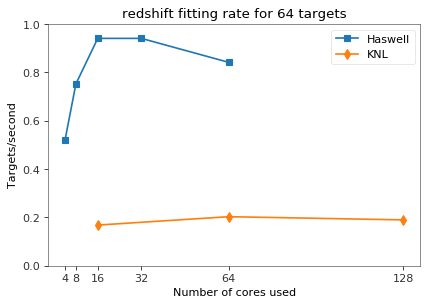

In [67]:
x = x[np.argsort(x['ncpu'])]
ii = x['ntarg'] == 64
hsw = ii & (x['cpu'] == b'hsw')
knl = ii & (x['cpu'] == b'knl')

hsw_rate = 64/x['time'][hsw]
knl_rate = 64/x['time'][knl]
plot(x['ncpu'][hsw], hsw_rate, 's-', label='Haswell')
plot(x['ncpu'][knl], knl_rate, 'd-', label='KNL')
legend(loc='upper right')
xticks([4, 8, 16, 32, 64, 128])
ylim(0, 1)
xlabel('Number of cores used')
ylabel('Targets/second')
title('redshift fitting rate for 64 targets')
savefig('orig_rate_vs_cores.png')

print('HSW/KNL node rate ratio for 64 targets: {:.2f}'.format(np.max(hsw_rate) / np.max(knl_rate)))

## Scaling with number of targets

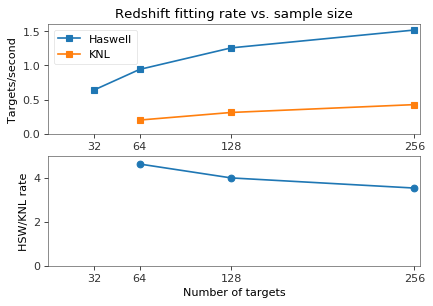

In [68]:
x = x[np.argsort(x['ntarg'])]
hsw = (x['ncpu'] == 16) & (x['cpu'] == b'hsw')
knl = (x['ncpu'] == 64) & (x['cpu'] == b'knl')

hsw_rate = x['ntarg'][hsw]/x['time'][hsw]
knl_rate = x['ntarg'][knl]/x['time'][knl]

subplot(211)
plot(x['ntarg'][hsw], hsw_rate, 's-', label='Haswell')
plot(x['ntarg'][knl], knl_rate, 's-', label='KNL')
legend(loc='upper left')
xlim(0, 260)
ylim(0, 1.6)
xticks([32,64,128,256])
title('Redshift fitting rate vs. sample size')
ylabel('Targets/second')

subplot(212)
plot(x['ntarg'][hsw][1:], hsw_rate[1:]/knl_rate, 'o-')
ylim(0, 5)
xlim(0, 260)
xticks([32,64,128,256])
xlabel('Number of targets')
ylabel('HSW/KNL rate')

savefig('orig_rate_vs_ntargets.png')